# Exercise sheet 9
**Hello everyone!**

**Points: 15**

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:

1. Make a folder called "exercise9".
2. Put your submission "Exercise sheet 9.ipynb" in there.
3. Complete the sheet. Only put code or text inside the blocks where "# YOUR CODE HERE" or "YOUR ANSWER HERE" is written. Everything else will be deleted during grading. Don't add new blocks.
4. Then zip the folder called "exercise9". This will create a zip file called "exercise9.zip". Rename that zip file to your Unibas short name, e.g. "blabla0000.zip".

Common mistakes:
- Don't use capital letter for your identification name, or the exercise folder.
- Don't put previous sheet or dataset on the submission folders. Just the sheet, ipynb format.



**Handout date**: 2022/05/10 <br>
**Submission date**: 2022/05/17 <br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# More uncertainty and confidence intervals!
In this notebook we will get more and more confidence on confidence intervals. 
This sheet should be handled quickly if you understood the two previous sheets well (especially sheet 7).
This notebook contains more mathematical notations that usually. However, there are here only to make the exercise clear. You won't need to run difficult computations other than empirical mean and empirical standard deviation.


# Titanic dataset
We are working with a dataset containing information about passengers of the sadly famous Titanic. We will see how we can use tools from the lecture to get a sense of what factors are important to increase our probability of survival during a shipwreck.<br>

In this first part, we will load the dataset, and plot a few values to see what could be the important parameters. In a second part, we will focus on one particular feature and see if you can trust the dataset.

We first load the dataset. If you are working locally, you should be able to load the dataset from the csv file name 'train.csv', in the same location as this current file.

In [2]:
import pandas as pd
data_source = "https://raw.githubusercontent.com/paulhendricks/titanic/master/inst/data-raw/train.csv"
data = pd.read_csv(data_source)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Among the passengeners that survived, display the proportion (histogram) of each 'Pclass'.<br>
On the same plot, display the same histogram for the passengers that didn't survive.<br>
Hint: you can use plt.hist.

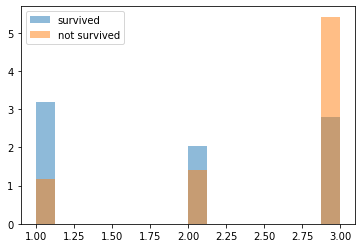

In [3]:
### BEGIN SOLUTION ###
data_class = data[['Survived','Pclass']]
data_class_survived = data_class[data_class['Survived']==1]
data_class_not_survived = data_class[data_class['Survived']==0]

plt.hist(data_class_survived['Pclass'],bins=16,alpha=0.5,label='survived',density=True)
plt.hist(data_class_not_survived['Pclass'],bins=16,alpha=0.5,label='not survived',density=True)
plt.legend()

### END SOLUTION ###

Among the passengeners that survived, display the proportion (histogram) of each 'Fare'.<br>
On the same plot, display the same histogram for the passengers that didn't survive.<br>
Hint: you can use plt.hist.

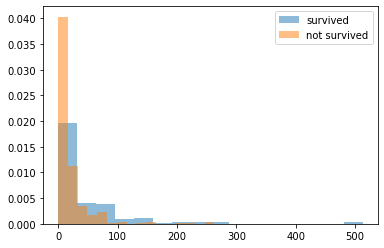

In [4]:
### BEGIN SOLUTION ###
data_Fare = data[['Survived','Fare']]
data_Fare_survived = data_Fare[data_Fare['Survived']==1]
data_Fare_not_survived = data_Fare[data_Fare['Survived']==0]

plt.hist(data_Fare_survived['Fare'],bins=16,alpha=0.5,label='survived',density=True)
plt.hist(data_Fare_not_survived['Fare'],bins=16,alpha=0.5,label='not survived',density=True)
plt.legend()
### END SOLUTION ###

Among the passengeners that survived, display the proportion (histogram) of each age.<br>
On the same plot, display the same histogram for the passengers that didn't survive.<br>
Hint: you can use plt.hist.

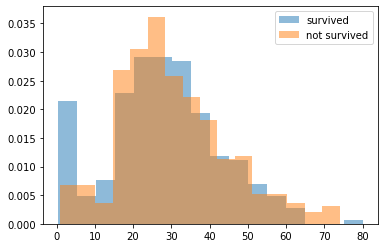

In [5]:
### BEGIN SOLUTION ###
data_age = data[['Survived','Age']]
data_age_survived = data_age[data_age['Survived']==1]
data_age_not_survived = data_age[data_age['Survived']==0]


plt.hist(data_age_survived['Age'],bins=16,alpha=0.5,label='survived',density=True)
plt.hist(data_age_not_survived['Age'],bins=16,alpha=0.5,label='not survived',density=True)
plt.legend()

### END SOLUTION ###

Display on the same plot, the proportion of female that survived and the proportion of male. Hint: you can use plt.hist.<br>
Among the passengers, compute the proportion of survivors that are women and store it in *surv_female*.<br>
Among the passengers, compute the proportion of survivors that are men and store it in *surv_male*.


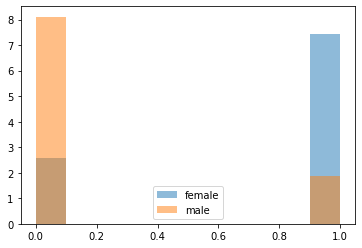

In [6]:
surv_female = 0
surv_male = 0 
### BEGIN SOLUTION ###
data_sex = data[['Survived','Sex']]
data_female = data_sex[data_sex['Sex']=='female']
data_male = data_sex[data_sex['Sex']=='male']

plt.hist(data_female['Survived'],alpha=0.5,label='female',density=True)
plt.hist(data_male['Survived'],alpha=0.5,label='male',density=True)
plt.legend()

surv_female = (data_female['Survived']==1).sum()/len(data_sex)
surv_male = (data_male['Survived']==1).sum()/len(data_sex)
### END SOLUTION ###

In [7]:
print(surv_female)
print(surv_male)
### BEGIN HIDDEN TESTS 
assert_almost_equal(surv_female , 0.2615039281705948 , places=2)
assert_almost_equal(surv_male , 0.122334455667789 , places=2)
### END HIDDEN TESTS 

0.2615039281705948
0.122334455667789


## Will your sex increase or decrease your probability of survival?

Let $(X_i)_{i\leq N_X} \overset{i.i.d.}{\sim} \mathrm{Ber}(p_X)$ denote $N_X$ Bernoulli random variables that model the outcome of a female on the Titanic. <br>
Let $(Y_i)_{i\leq N_Y} \overset{i.i.d.}{\sim} \mathrm{Ber}(p_Y)$ denote $N_Y$ Bernoulli random variables that model the outcome of a male on the Titanic.<br>

We aim at estimating the probailty of survival $p_X$ and $p_Y$.

Ideally we would like to get the values $p_X = \mathbb{E}[X_i]$ and $p_Y = \mathbb{E}[Y_i]$. Unfortunately, we only have access to the $N_X$ realizations $(X_i)$ and $N_Y$ realization $(Y_i)$. <br>

Use the law of large numbers to create an estimate $\hat p_X$ of $p_X$ and an estimate $\hat p_Y$ of $p_Y$. Name these estimators *pX_hat* and *pY_hat*.

In [8]:
pX_hat = 0
pY_hat = 0
### BEGIN SOLUTION ###
pX_hat = (data_female['Survived']==1).mean()
pY_hat = (data_male['Survived']==1).mean()
### END SOLUTION ###

In [9]:
print(pX_hat)
print(pY_hat)
assert_almost_equal(pX_hat , 0.7420382165605095 , places=2)
assert_almost_equal(pY_hat , 0.18890814558058924 , places=2)

0.7420382165605095
0.18890814558058924


Let's do some math (or follow slides of lecture 10).<br>
We have some estimate for $p_X$ and $p_Y$, but we would like to know if we can trust them. <br>

Let's first focus of $p_X$. <br>
We want to compute the probability $p_{trust X}$
$$ p_{trust X} = \mathbb{P}\left( p_X-0.05 \leq \hat X \leq p + 0.05 \right). $$

Based the central limit theorem, we'll make the assumption that $\hat p_X \sim \mathcal{N}(p_X, \sigma^2/N_X)$.<br>
Then, following slides of lecture 10 (p18, p19), we have
$$ p_{trust X} = \mathbb{P}\left( Z \leq 0.05\sqrt{ \frac{N_X}{p_X(1-p_X)}} \right)-\mathbb{P}\left( Z \leq -0.05\sqrt{ \frac{N_X}{p_X(1-p_X)}} \right), $$
where $Z\sim \mathcal{N}(0,1)$. <br>
As mentioned during the lecture, we don't know $p_X(1-p_X)$. Let's replace this term by $\hat p_X(1-\hat p_X)$.




Compute the value 
$$ p1 = \mathbb{P}\left( Z \leq 0.05\sqrt{ \frac{N_X}{\hat p_X(1-\hat p_X)}} \right)$$
and 
$$ p2 = \mathbb{P}\left( Z \leq -0.05\sqrt{ \frac{N_X}{\hat p_X(1-\hat p_X)}} \right).$$
Store these values in variables named $p1$ and $p2$.<br>
Hint: you can have access to the cumulative distribvutuion function (cdf) of a Gaussian random variable by using the function *norm* (for normal) form the library *scipy.stats* (already imported).

In [10]:
# Leave this block. 
# This is to make sure that your next answer can still bring you points even if you make a mistake previously.
pX_hat = 0.7420382165605095
pY_hat = 0.18890814558058924

In [11]:
### BEGIN SOLUTION ###
N_X = len(data_female)
p1 = norm.cdf(0.05*np.sqrt(N_X/(pX_hat*(1-pX_hat)))) 
p2 = norm.cdf(-0.05*np.sqrt(N_X/(pX_hat*(1-pX_hat)))) 
### END SOLUTION ###

In [12]:
print(p1, p2)
assert_almost_equal(p1 , 0.978570861003359 , places=2)
assert_almost_equal(p2 , 0.02142913899664103 , places=2)

0.978570861003359 0.02142913899664103


Based on the previous assumptions, what is the probability that $\hat p_X \in [p_X - 0.05, p_X+0.05]$? Store your answer in a variable named *proba_trust_X*.

In [13]:
# Leave this block. 
# This is to make sure that your next answer can still bring you points even if you make a mistake previously.
p1 = 0.978570861003359
p2 = 0.02142913899664103 

In [14]:
proba_trust_X = 0
### BEGIN SOLUTION ###
proba_trust_X = p1 - p2
### END SOLUTION ###

In [15]:
print(proba_trust_X)
assert_almost_equal(proba_trust_X , 0.957141722006718 , places=2)

0.957141722006718


Using a similar approach, compute the probability that $\hat p_Y \in [p_Y - 0.05, p_Y+0.05]$? Store your answer in a variable named *proba_trust_Y*.

In [16]:
### BEGIN SOLUTION ###
N_Y = len(data_male)
p1 = norm.cdf(0.05*np.sqrt(N_Y/(pY_hat*(1-pY_hat)))) 
p2 = norm.cdf(-0.05*np.sqrt(N_Y/(pY_hat*(1-pY_hat)))) 
proba_trust_Y = p1 - p2
### END SOLUTION ###

In [17]:
### BEGIN HIDDEN TESTS 
print(proba_trust_Y)
assert_almost_equal(proba_trust_Y , 0.9978471824002983 , places=2)
### END HIDDEN TESTS 

0.9978471824002983


# What about the children?
Should we remove the children in the previous analysis about the sex? If we do so, the number of women drop from 314 to 259. And we have seen in the lecture that the lower the number of sample, the worse is the confidence interval. 
<br>
But anyway, let's finish by checking that children have a very high probability of survival. Compute the probability of survival of a child (age<18) and store it in *proba_surv_child*.


In [18]:
proba_surv_child = 0
### BEGIN SOLUTION ###
data_child = data[['Survived','Age','Sex']]
data_child = data_child[data_child['Age']<18]

proba_surv_child = (data_child['Survived']==1).mean()
print("Number of children that survived:", (data_child['Survived']==1).sum())
print("Number of children that didn't survive:",(data_child['Survived']==0).sum())

data_child_female = data_child[data_child['Sex']=='female']
data_child_male = data_child[data_child['Sex']=='male']
#print(len(data_child_male),len(data_child_female))
### END SOLUTION ###

Number of children that survived: 61
Number of children that didn't survive: 52


In [19]:
print(proba_surv_child)
### BEGIN HIDDEN TESTS 
assert_almost_equal(proba_surv_child , 0.5398230088495575 , places=2)
### END HIDDEN TESTS 

0.5398230088495575
